## Problem Description

`car_evaluation` is a car dataset

Evaluating a Car based on some popular attributes which could be beneficial in decision making while purchasing a Car, Who do not have enough knowledge about Cars.

Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.

Use machine learning to build a classifier which tells how good a car is

In [358]:
#RS 只有第一次运行时需要安装依赖，之后可以注释掉节约时间
#!pip install numpy pandas matplotlib seaborn scikit-learn category_encoders --quiet

In [359]:
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import os

In [360]:
#RS 使用时需要将dataPath改为自己数据保存路径
dataPath = 'D:/学习/CPT406 AI/cw/car_evaluation.csv'
df = pd.read_csv(dataPath, header=None)

In [361]:
df.shape

(1728, 7)

In [362]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [363]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [364]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [366]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    
    print(df[col].value_counts())   


buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [367]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [368]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [369]:
X = df.drop(['class'], axis=1)

y = df['class']

In [370]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [371]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [372]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [373]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [374]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [375]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [376]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


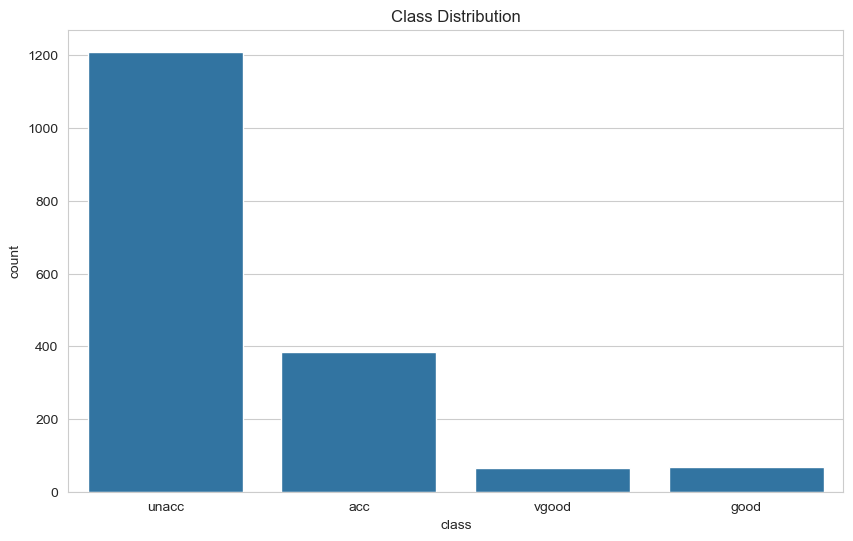

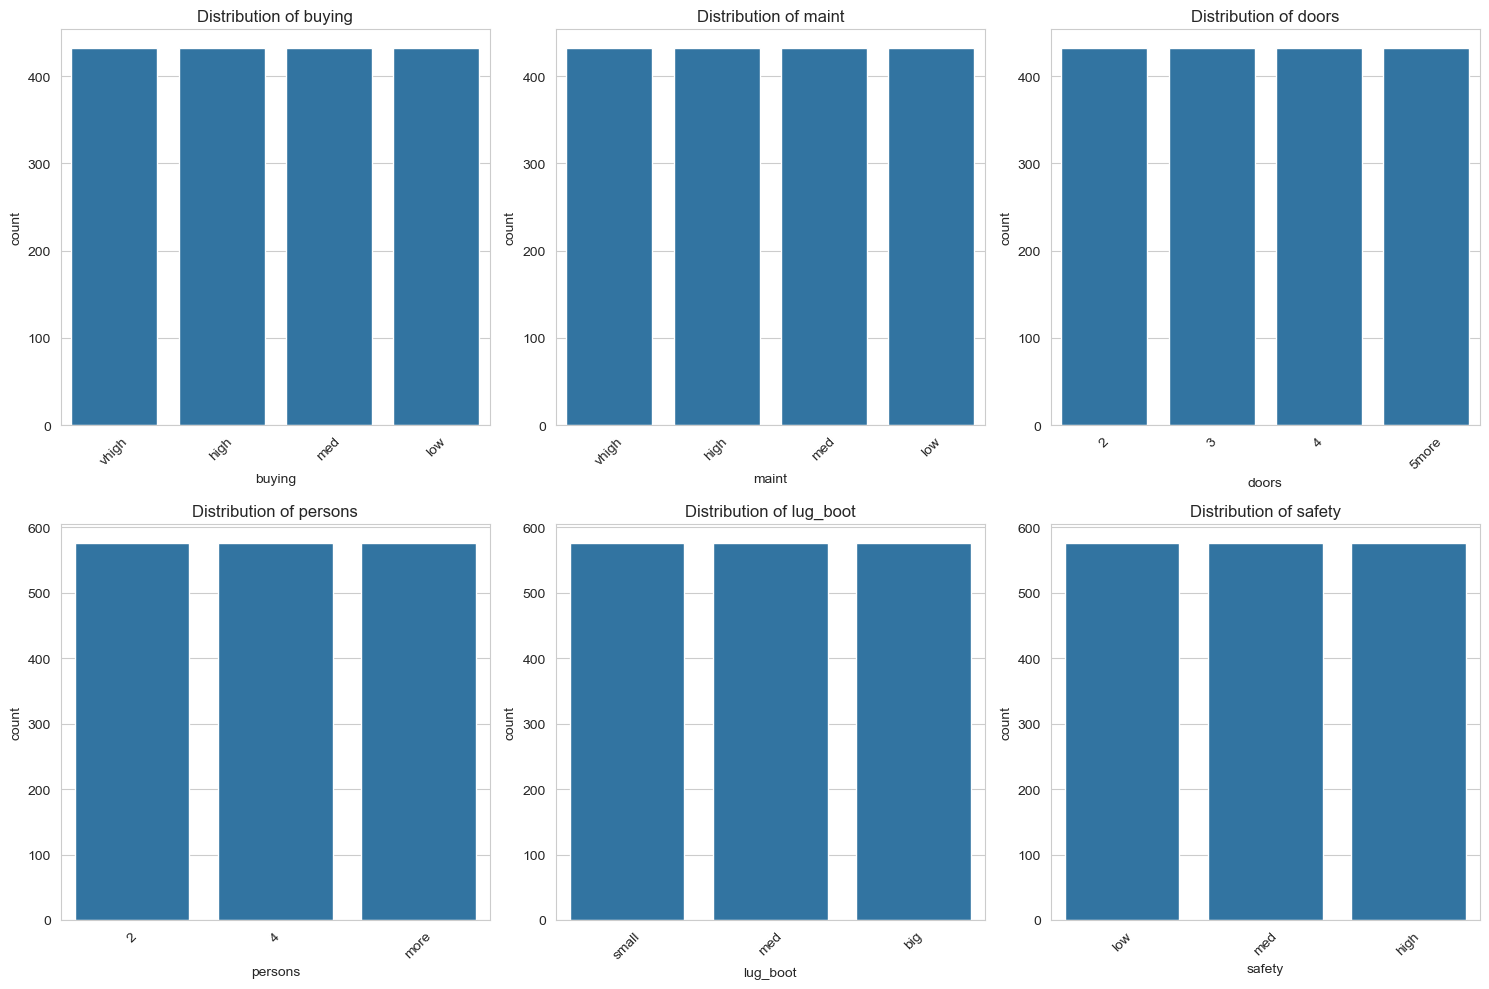

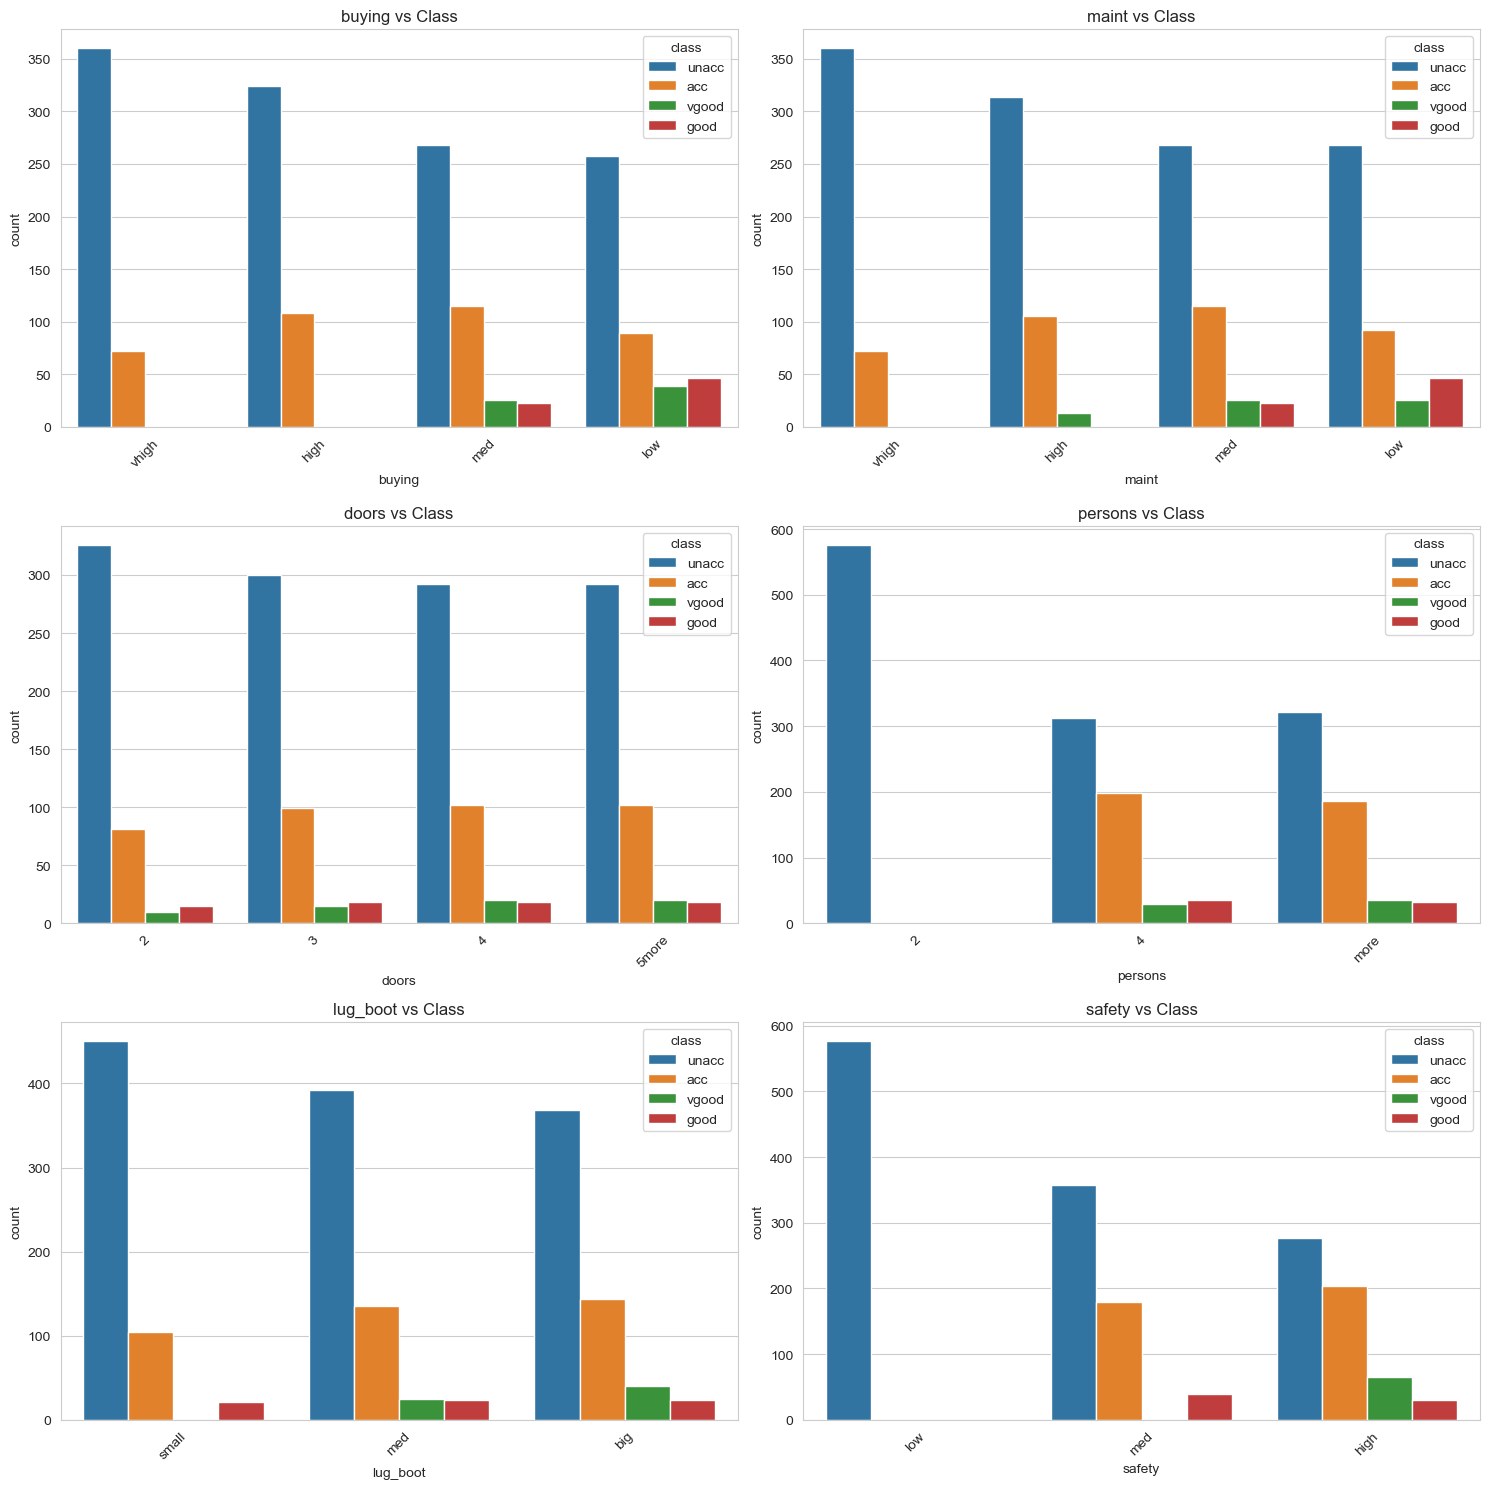

In [377]:
#KI 添加更全面的EDA
df['class'].value_counts()
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 类别分布可视化
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='class')
plt.title('Class Distribution')
plt.show()

# 2. 特征分布分析
plt.figure(figsize=(15,10))
for i, col in enumerate(col_names[:-1]):  # 排除目标变量
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. 特征与目标变量的关系
plt.figure(figsize=(15,15))
for i, col in enumerate(col_names[:-1]):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=col, hue='class')
    plt.title(f'{col} vs Class')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [378]:
#Fishhead 处理类别不平衡
from imblearn.over_sampling import SMOTE

# 应用SMOTE过采样
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 打印类别分布情况
print("原始训练集类别分布:", pd.Series(y_train).value_counts())
print("SMOTE处理后类别分布:", pd.Series(y_train_smote).value_counts())

原始训练集类别分布: class
unacc    813
acc      255
good      49
vgood     40
Name: count, dtype: int64
SMOTE处理后类别分布: class
unacc    813
good     813
acc      813
vgood    813
Name: count, dtype: int64


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [379]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train, y_train)

y_pred_RF_10_origin_holdout = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

print('Original Data Trained | Model accuracy score with 10 decision-trees: {0:0.4f}'. format(accuracy_score(y_test, y_pred_RF_10_origin_holdout)))

Original Data Trained | Model accuracy score with 10 decision-trees: 0.9457


In [380]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(X_train, y_train)

y_pred_RF_100_origin_holdout = rfc_100.predict(X_test)

print('Original Data Trained | Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_RF_100_origin_holdout)))

Original Data Trained | Model accuracy score with 100 decision-trees : 0.9457


In [381]:
#RS 尝试使用更多的决策树
rfc_200 = RandomForestClassifier(n_estimators=200, random_state=0)

rfc_200.fit(X_train, y_train)

y_pred_RF_200_origin_holdout = rfc_200.predict(X_test)

print('Original Data Trained | Model accuracy score with 200 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_RF_200_origin_holdout)))

Original Data Trained | Model accuracy score with 200 decision-trees : 0.9405


In [382]:
#RS 用SMOTE处理后的数据集训练模型
rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train_smote, y_train_smote)

y_pred_RF_10_SMOTE_holdout = rfc.predict(X_test)

print('SMOTE Data Trained | Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_RF_10_SMOTE_holdout)))

SMOTE Data Trained | Model accuracy score with 100 decision-trees : 0.9405


In [383]:
#RS 进行k折交叉验证
from sklearn.model_selection import cross_val_score

#原始数据训练
# 创建随机森林分类器
rfc = RandomForestClassifier(random_state=0)

# 进行k折交叉验证
k = 10
cv_scores_RF_10_origin_kfold = cross_val_score(rfc, X_train, y_train, cv=k, scoring='accuracy')
y_pred_RF_10_origin_kfold = cv_scores_RF_10_origin_kfold.mean()

# 输出交叉验证结果
print("在原始数据集上进行k折交叉验证结果:")
print(f"{k}-折交叉验证准确率分数:", cv_scores_RF_10_origin_kfold)
print(f"平均交叉验证准确率: {cv_scores_RF_10_origin_kfold.mean():0.4f}")
print(f"标准差: {cv_scores_RF_10_origin_kfold.std():0.4f}")

#SMOTE数据训练
# 创建随机森林分类器
rfc = RandomForestClassifier(random_state=0)

# 进行k折交叉验证
k = 10
cv_scores_RF_10_SMOTE_kfold = cross_val_score(rfc, X_train_smote, y_train_smote, cv=k, scoring='accuracy')
y_pred_RF_10_SMOTE_kfold = cv_scores_RF_10_SMOTE_kfold.mean()

# 输出交叉验证结果
print("")
print("在SMOTE数据集上进行k折交叉验证结果:")
print(f"{k}-折交叉验证准确率分数:", cv_scores_RF_10_SMOTE_kfold)
print(f"平均交叉验证准确率: {cv_scores_RF_10_SMOTE_kfold.mean():0.4f}")
print(f"标准差: {cv_scores_RF_10_SMOTE_kfold.std():0.4f}")

在原始数据集上进行k折交叉验证结果:
10-折交叉验证准确率分数: [0.96551724 0.95689655 0.95689655 0.95689655 0.94827586 0.98275862
 0.94827586 0.90434783 0.96521739 0.93913043]
平均交叉验证准确率: 0.9524
标准差: 0.0196

在SMOTE数据集上进行k折交叉验证结果:
10-折交叉验证准确率分数: [0.97239264 0.97852761 0.98153846 0.97538462 0.95692308 0.97230769
 0.96923077 0.97230769 0.95384615 0.95384615]
平均交叉验证准确率: 0.9686
标准差: 0.0096


In [384]:
#RS 这一部分未修改，继续使用原始数据进行特征重要性分析
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [385]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

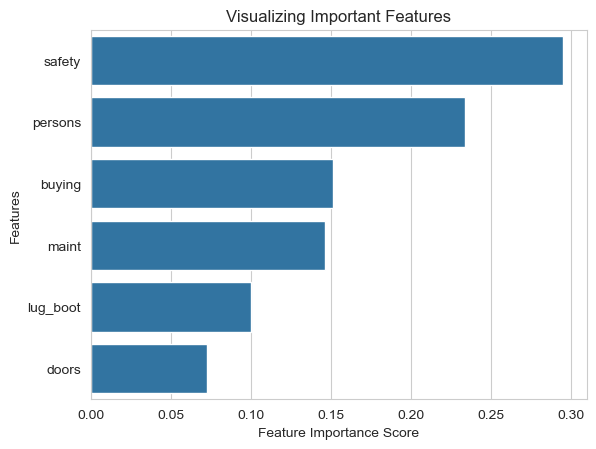

In [386]:
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.show()

In [387]:
#去除doors变量
X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [388]:
from sklearn.model_selection import train_test_split

X_train_noDoors, X_test_noDoors, y_train_noDoors, y_test_noDoors = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [389]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])

X_train_noDoors = encoder.fit_transform(X_train_noDoors)

X_test_noDoors = encoder.transform(X_test_noDoors)

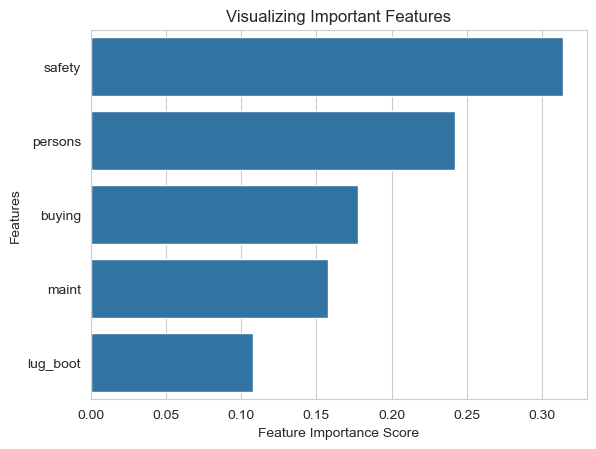

In [390]:
#RS 可视化验证去除doors对其他特征的重要性顺序没有影响
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train_noDoors, y_train_noDoors)

feature_scores = pd.Series(clf.feature_importances_, index=X_train_noDoors.columns).sort_values(ascending=False)

sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.show()

In [391]:
#RS 对去除doors的数据集应用SMOTE过采样
smote = SMOTE(random_state=42)
X_train_smote_noDoors, y_train_smote_noDoors = smote.fit_resample(X_train_noDoors, y_train_noDoors)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [392]:
clf = RandomForestClassifier(random_state=0)

clf.fit(X_train_noDoors, y_train_noDoors)

y_pred_RF_10_noDoors_holdout = clf.predict(X_test_noDoors)

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test_noDoors, y_pred_RF_10_noDoors_holdout)))

Model accuracy score with doors variable removed : 0.9264


In [393]:
clf = RandomForestClassifier(random_state=0)

clf.fit(X_train_smote_noDoors, y_train_smote_noDoors)

y_pred_RF_10_SMOTE_noDoors_holdout = clf.predict(X_test_noDoors)

print('SMOTE Data Trained | Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test_noDoors, y_pred_RF_10_SMOTE_noDoors_holdout)))

SMOTE Data Trained | Model accuracy score with doors variable removed : 0.9457


In [396]:
#RS 用去除doors的数据集进行k折交叉验证
from sklearn.model_selection import cross_val_score

#原始数据训练
# 创建随机森林分类器
rfc = RandomForestClassifier(random_state=0)

# 进行k折交叉验证
k = 10
cv_scores_RF_10_noDoors_kfold = cross_val_score(rfc, X_train_noDoors, y_train_noDoors, cv=k, scoring='accuracy')
y_pred_RF_10_noDoors_kfold = cv_scores_RF_10_noDoors_kfold.mean()

# 输出交叉验证结果
print("在去除doors变量的数据集上进行k折交叉验证结果:")
print(f"{k}-折交叉验证准确率分数:", cv_scores_RF_10_noDoors_kfold)
print(f"平均交叉验证准确率: {cv_scores_RF_10_noDoors_kfold.mean():0.4f}")
print(f"标准差: {cv_scores_RF_10_noDoors_kfold.std():0.4f}")

#SMOTE数据训练
# 创建随机森林分类器
rfc = RandomForestClassifier(random_state=0)

# 进行k折交叉验证
k = 10
cv_scores_RF_10_SMOTE_noDoors_kfold = cross_val_score(rfc, X_train_smote_noDoors, y_train_smote_noDoors, cv=k, scoring='accuracy')
y_pred_RF_10_SMOTE_noDoors_kfold = cv_scores_RF_10_SMOTE_noDoors_kfold.mean()

# 输出交叉验证结果
print("")
print("在去除doors变量的SMOTE数据集上进行k折交叉验证结果:")
print(f"{k}-折交叉验证准确率分数:", cv_scores_RF_10_SMOTE_noDoors_kfold)
print(f"平均交叉验证准确率: {cv_scores_RF_10_SMOTE_noDoors_kfold.mean():0.4f}")
print(f"标准差: {cv_scores_RF_10_SMOTE_noDoors_kfold.std():0.4f}")

在去除doors变量的数据集上进行k折交叉验证结果:
10-折交叉验证准确率分数: [0.93965517 0.93103448 0.93103448 0.94827586 0.93103448 0.95689655
 0.94827586 0.94782609 0.93043478 0.93043478]
平均交叉验证准确率: 0.9395
标准差: 0.0095

在去除doors变量的SMOTE数据集上进行k折交叉验证结果:
10-折交叉验证准确率分数: [0.94785276 0.92638037 0.93846154 0.94461538 0.93538462 0.92
 0.94153846 0.93846154 0.95076923 0.93538462]
平均交叉验证准确率: 0.9379
标准差: 0.0089


In [397]:
from sklearn.metrics import classification_report
#XX -----------------------------------------------
# 模型比较：Support Vector Machine（SVM）
# -----------------------------------------------
from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state=0)
svc.fit(X_train_smote, y_train_smote)
y_pred_SVM_origin_holdout = svc.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_SVM_origin_holdout))
print(classification_report(y_test, y_pred_SVM_origin_holdout))

# -----------------------------------------------
# 模型比较：K-Nearest Neighbors（KNN）
# -----------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)
y_pred_KNN_origin_holdout = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_KNN_origin_holdout))
print(classification_report(y_test, y_pred_KNN_origin_holdout))


SVM Accuracy: 0.9019264448336253
              precision    recall  f1-score   support

         acc       0.78      0.84      0.81       129
        good       0.42      0.90      0.57        20
       unacc       1.00      0.93      0.96       397
       vgood       0.95      0.72      0.82        25

    accuracy                           0.90       571
   macro avg       0.79      0.85      0.79       571
weighted avg       0.93      0.90      0.91       571

KNN Accuracy: 0.830122591943958
              precision    recall  f1-score   support

         acc       0.68      0.84      0.75       129
        good       0.28      0.55      0.37        20
       unacc       0.97      0.87      0.92       397
       vgood       0.54      0.28      0.37        25

    accuracy                           0.83       571
   macro avg       0.62      0.64      0.60       571
weighted avg       0.86      0.83      0.84       571



In [398]:
#XX 输出三种模型的准确率比较
# print("Model Accuracy Comparision：")
# print(f"Random Forest: {accuracy_score(y_test, y_pred_):.4f}")
# print(f"SVM:            {accuracy_score(y_test, y_pred_svc):.4f}")
# print(f"KNN:            {accuracy_score(y_test, y_pred_knn):.4f}")


In [399]:
#XX 混淆矩阵
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix
#
# def plot_enhanced_confusion_matrix(y_true, y_pred, labels, model_name, cmap='Blues'):
#     # 计算原始混淆矩阵
#     cm = confusion_matrix(y_true, y_pred, labels=labels)
#
#     # 计算各类别的统计指标
#     recall = np.diag(cm) / np.sum(cm, axis=1)  # 召回率/正确率 (TP/(TP+FN))
#     precision = np.diag(cm) / np.sum(cm, axis=0)  # 精确率 (TP/(TP+FP))
#     fpr = []  # 假阳性率 (FP/(FP+TN))
#     fnr = []  # 假阴性率 (FN/(FN+TP))
#
#     for i in range(len(labels)):
#         fp = np.sum(cm[:, i]) - cm[i, i]
#         fn = np.sum(cm[i, :]) - cm[i, i]
#         tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
#
#         fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)
#         fnr.append(fn / (fn + cm[i, i]) if (fn + cm[i, i]) > 0 else 0)
#
#     # 创建带注释的矩阵
#     annot_matrix = np.zeros_like(cm, dtype=object)
#     for i in range(len(labels)):
#         for j in range(len(labels)):
#             if i == j:
#                 # 对角线显示正确率和样本数
#                 annot_matrix[i, j] = f"Acc: {recall[i]:.1%}\n{cm[i, j]}"
#             else:
#                 # 非对角线显示原始计数
#                 annot_matrix[i, j] = str(cm[i, j])
#
#     # 绘制热图
#     plt.figure(figsize=(10, 6))  # 增加图形宽度
#     ax = sns.heatmap(cm, annot=annot_matrix, fmt='', cmap=cmap,
#                     xticklabels=labels, yticklabels=labels,
#                     linewidths=0.5, linecolor='lightgray')
#
#     # 添加额外信息（优化位置和格式）
#     info_text = "\n\n".join([  # 使用两个换行符增加行间距
#         f"{label}: Acc={recall[i]:.1%}, FPR={fpr[i]:.1%}, FNR={fnr[i]:.1%}"
#         for i, label in enumerate(labels)
#     ])
#
#     # 调整信息框位置参数
#     plt.text(
#         cm.shape[1] + 1.2,  # 向右移动1.2个单位
#         cm.shape[0] / 2,    # 垂直居中
#         info_text,
#         ha='left',
#         va='center',        # 垂直居中
#         bbox=dict(
#             facecolor='white',
#             alpha=0.8,
#             boxstyle='round,pad=0.5'  # 增加内边距
#         ),
#         fontsize=11,        # 调整字体大小
#         linespacing=1.5     # 增加行间距
#     )
#
#     plt.title(f'Enhanced Confusion Matrix - {model_name}\n', pad=20)  # 增加标题间距
#     plt.xlabel('Predicted Label')
#     plt.ylabel('True Label')
#     plt.tight_layout()
#     plt.show()
#
# # 设置类别顺序
# labels = ['unacc', 'acc', 'good', 'vgood']
#
# # 混淆矩阵：Random Forest
# # plot_enhanced_confusion_matrix(y_test, y_pred, labels, 'Random Forest', cmap='Blues')
# # 混淆矩阵：SVM
# plot_enhanced_confusion_matrix(y_test, y_pred_SVM_origin_holdout, labels, 'SVM', cmap='Oranges')
# # 混淆矩阵：KNN
# plot_enhanced_confusion_matrix(y_test, y_pred_KNN_origin_holdout, labels, 'KNN', cmap='Greens')


In [400]:
#Fishhead 模型导出与应用示例
# import pickle
#
# # 保存最佳模型到文件
# try:
#     best_model = best_rf  # 如果运行了超参数调优
# except NameError:
#     best_model = rfc_100  # 否则使用100棵决策树的随机森林
#
# # 在这里添加我之前建议的代码 ↓
#
# # 1. 使用SMOTE平衡后的数据训练模型
# rfc_balanced = RandomForestClassifier(n_estimators=100, random_state=0)
# rfc_balanced.fit(X_train_smote, y_train_smote)  # 使用SMOTE平衡后的数据
#
# # 2. 保存平衡后训练的模型 (使用这个而不是上面的best_model)
# with open('car_evaluation_model.pkl', 'wb') as file:
#     pickle.dump(rfc_balanced, file)
# print("模型已保存至 car_evaluation_model.pkl")
#
# # 3. 创建真正代表高质量和低质量汽车的测试样例
# # 高质量汽车特征 (例如：低价格，低维护成本，4+门，4+座位，大行李箱，高安全性)
# high_quality_car = pd.DataFrame([[3, 3, 4, 2, 3, 3]],
#                                columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
#
# # 低质量汽车特征 (例如：非常高价格，高维护成本，2门，2座位，小行李箱，低安全性)
# low_quality_car = pd.DataFrame([[1, 1, 3, 3, 1, 1]],
#                               columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
#
# # 4. 进行预测
# high_quality_prediction = rfc_balanced.predict(high_quality_car)[0]
# low_quality_prediction = rfc_balanced.predict(low_quality_car)[0]
#
# print("\n模型应用示例:")
# print(f"优质车预测: {high_quality_prediction}")
# print(f"低质车预测: {low_quality_prediction}")